In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset into python environment
data=pd.read_csv('Add_sales_data_2018.csv')
df=pd.DataFrame(data)

In [3]:
# Display the first 5 rows of the dataset
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
# Get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


### 1.Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

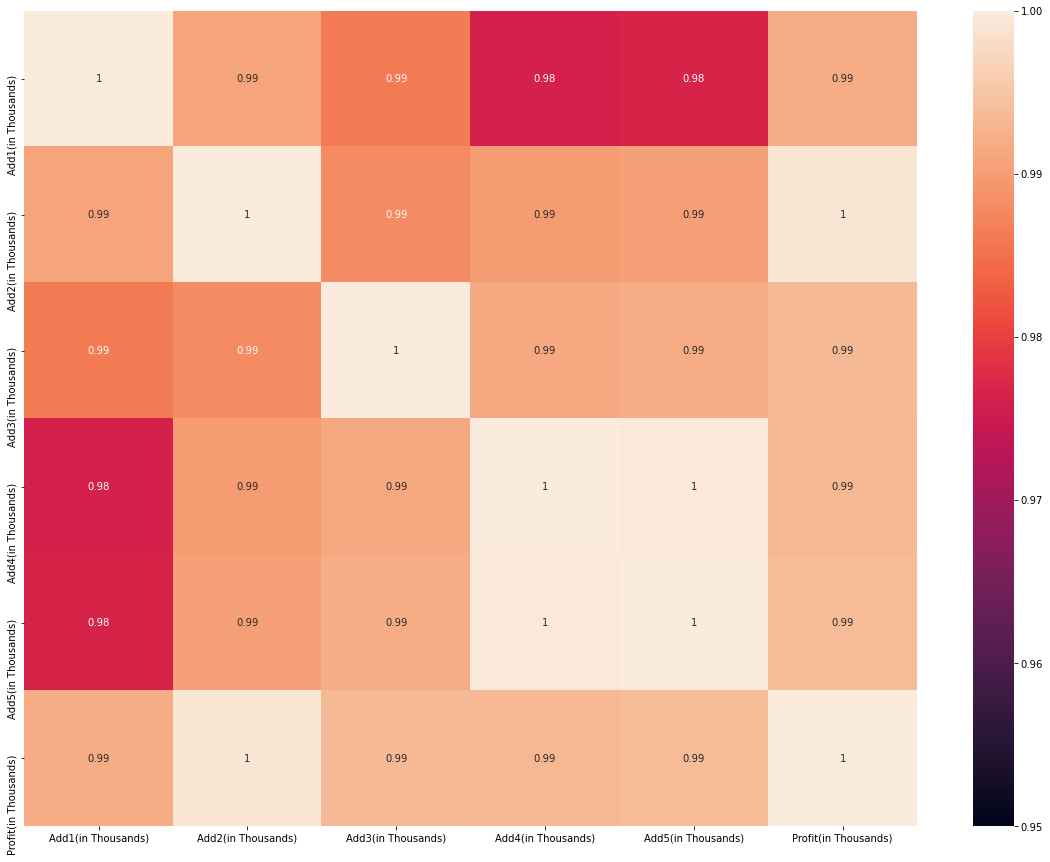

In [5]:
# Find the correlation and display the heatmap to show the correlation visually
corr_matrix=df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix,vmin=0.95,vmax=1,annot=True)

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [6]:
# Check the column names
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [7]:
# Define the dependent and independent variables 
y=df['Profit(in Thousands)']
X=df.drop(['Date','Profit(in Thousands)'],axis=1)

In [8]:
# Import train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [9]:
# Build Linear Regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64


In [10]:
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788]


In [16]:
#Get the coefficient and intercept value of the model 
print("The model coefficient is:", model.coef_)
print("The model intercept value is:", model.intercept_)

# To evaluate the model using Mean squared error and R squared value
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,predictions))

# Comment Findings
print("This model is a best fit for our data, as the MSE value is very small and r2_ score value is 1.")

The model coefficient is: [ 1.   12.38  3.5   1.    0.9 ]
The model intercept value is: -3.637978807091713e-12
MSE is: 6.657795174207296e-25
R squared value is: 1.0
This model is a best fit for our data, as the MSE value is very small and r2_ score value is 1.


### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [12]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [13]:
sample = [[290,312,309,298,320]]

In [17]:
profit1=model.predict(sample)
print("The profit generated by the company for the mentioned amount spent for advertisement would be", profit1)

The profit generated by the company for the mentioned amount spent for advertisement would be [5820.06]
